In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
data= pd.read_csv("dataset_for_datascience_assignment.csv")

### Data Preprocessing

In [ ]:
display(data.info())
display(data.isnull().sum())
display(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        21983 non-null  object 
 1   REGISTRATION_COUNTRY                     21983 non-null  object 
 2   PURCHASE_COUNT                           21983 non-null  int64  
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64
 5   FIRST_PURCHASE_DAY                       11964 non-null  object 
 6   LAST_PURCHASE_DAY                        12027 non-null  object 
 7   USER_ID                                  21983 non-null  int64  
 8   BREAKFAST_PURCHASES                      12028 non-null  float64
 9   LUNCH_PURCHASES                          12028 non-null  float64
 10  EVENING_PURCHASES                        12028

None

,0
REGISTRATION_DATE,0
REGISTRATION_COUNTRY,0
PURCHASE_COUNT,0
PURCHASE_COUNT_DELIVERY,9955
PURCHASE_COUNT_TAKEAWAY,9955
FIRST_PURCHASE_DAY,10019
LAST_PURCHASE_DAY,9956
USER_ID,0
BREAKFAST_PURCHASES,9955
LUNCH_PURCHASES,9955


,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,...,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS
count,21983.000000,12028.000000,12028.000000,21983.00000,12028.000000,12028.000000,12028.000000,12028.000000,12028.0,12028.000000,...,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,7832.000000,7832.000000,12028.000000
mean,3.345358,5.741686,0.372464,10992.00000,0.193964,2.375042,0.493432,3.029016,0.0,176.210419,...,42.068043,31.195060,2.900482,1.056535,2.157133,11.501995,4.010392,64.293539,55.792135,5.961218
std,8.523171,10.536220,1.416310,6346.08982,1.104067,5.626178,1.827710,5.238209,0.0,299.086986,...,41.176221,20.716542,7.456288,4.776431,6.876314,6.930837,2.010071,72.570103,74.963336,3.466263
min,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.0,1.012000,...,1.016000,1.012000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.002000
25%,0.000000,1.000000,0.000000,5496.50000,0.000000,0.000000,0.000000,0.000000,0.0,32.384000,...,23.368000,19.228000,0.000000,0.000000,0.000000,5.000000,2.000000,18.000000,10.000000,2.950500
50%,1.000000,2.000000,0.000000,10992.00000,0.000000,1.000000,0.000000,1.000000,0.0,75.900000,...,35.560000,27.324000,0.000000,0.000000,0.000000,11.500000,4.000000,39.500000,25.000000,5.928000
75%,3.000000,6.000000,0.000000,16487.50000,0.000000,2.000000,0.000000,3.000000,0.0,196.328000,...,51.816000,38.456000,2.000000,1.000000,1.000000,18.000000,6.000000,81.000000,68.250000,8.978000
max,320.000000,320.000000,44.000000,21983.00000,52.000000,171.000000,71.000000,104.000000,0.0,7979.620000,...,3048.000000,657.800000,200.000000,196.000000,221.000000,23.000000,7.000000,421.000000,421.000000,11.999000


In [ ]:
# Convert date columns to datetime objects
for col in ['REGISTRATION_DATE', 'FIRST_PURCHASE_DAY', 'LAST_PURCHASE_DAY']:
    data[col] = pd.to_datetime(data[col], errors='coerce')

In [ ]:
display(data.dtypes)

# handling numerical missing values

num_cols = data.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)

# handling categorical numerical values

cat_cols = data.select_dtypes(include='object').columns

for col in cat_cols:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)

,0
REGISTRATION_DATE,datetime64[ns]
REGISTRATION_COUNTRY,object
PURCHASE_COUNT,int64
PURCHASE_COUNT_DELIVERY,float64
PURCHASE_COUNT_TAKEAWAY,float64
FIRST_PURCHASE_DAY,datetime64[ns]
LAST_PURCHASE_DAY,datetime64[ns]
USER_ID,int64
BREAKFAST_PURCHASES,float64
LUNCH_PURCHASES,float64


<ipython-input-5-ee716d84cce2>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median_value, inplace=True)
<ipython-input-5-ee716d84cce2>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [ ]:
#check if any null values present
display(data.isnull().sum())


,0
REGISTRATION_DATE,0
REGISTRATION_COUNTRY,0
PURCHASE_COUNT,0
PURCHASE_COUNT_DELIVERY,0
PURCHASE_COUNT_TAKEAWAY,0
FIRST_PURCHASE_DAY,10019
LAST_PURCHASE_DAY,9956
USER_ID,0
BREAKFAST_PURCHASES,0
LUNCH_PURCHASES,0


#### Here first_purchase_date and last_purchase_date has missing values. let's create a column with records of who purchased

In [ ]:
# Number of users who made at least one order
data['IS_ACTIVE'] = data['PURCHASE_COUNT'] > 0

# Registration month for trend
data['REG_MONTH'] = data['REGISTRATION_DATE'].dt.to_period("M").astype(str)

### Analysis & Visualizations

Churn Rate: 45.28%


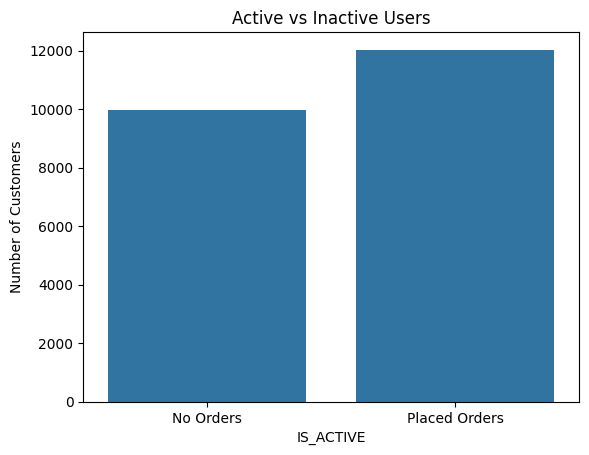

In [ ]:
# Customer Churn Rate
# Count active and inactive users
active_users = data[data['IS_ACTIVE'] == 1].shape[0]  # Number of users who placed orders
inactive_users = data[data['IS_ACTIVE'] == 0].shape[0]  # Number of users who did not place orders

# Calculate churn rate
total_users = active_users + inactive_users
churn_rate = (inactive_users / total_users) * 100

# Display the churn rate
print(f"Churn Rate: {churn_rate:.2f}%")

# Active vs Inactive Users
sns.countplot(x='IS_ACTIVE', data=data)
plt.title("Active vs Inactive Users")
plt.xticks([0,1], ['No Orders', 'Placed Orders'])
plt.ylabel("Number of Customers")
plt.show()

Calculating churn rate helps identify customers who stopped using services, highlithing the need to re-engage the inactive customers. It serves as a important factor to optimize strategies. 45.28% of customers stopped using services which suggests that there are issues with customer satisfaction or other service experience that need to be addressed to improve retentionand reduce churn.

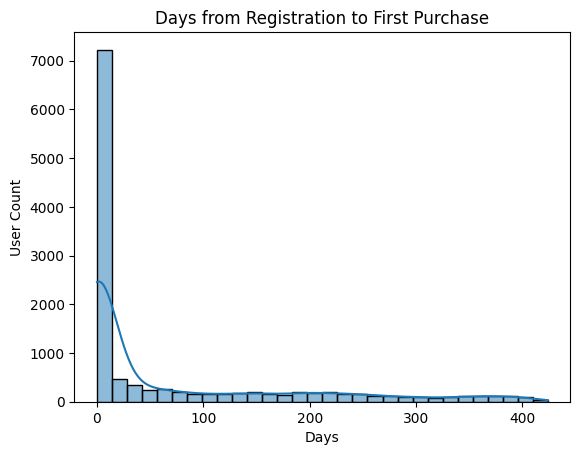

In [ ]:
# Time to First Purchase Distribution

data['DAYS_TO_FIRST_PURCHASE'] = (data['FIRST_PURCHASE_DAY'] - data['REGISTRATION_DATE']).dt.days

sns.histplot(data['DAYS_TO_FIRST_PURCHASE'], bins=30, kde=True)
plt.title("Days from Registration to First Purchase")
plt.xlabel("Days")
plt.ylabel("User Count")
plt.show()

Time to First Purchase Distribution shows how fast users purchase after registering. This insight guides targeted strategies like welcome offers and timely offer reminders. Majority of users placed their first order immediately after registeration and also there is a long tail which tells that some users wait weeks/months to order. This tells the need for improvement in welcome offers, reminders in early days for maximum conversion and output.

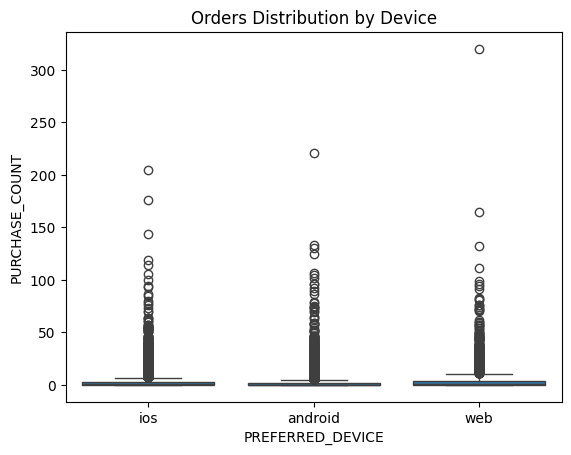

In [ ]:
# Orders by Device Type
sns.boxplot(x='PREFERRED_DEVICE', y='PURCHASE_COUNT', data=data)
plt.title("Orders Distribution by Device")
plt.show()

Useful for platform optimization. Most users regardless of users group around low purchase count. There are some outliers on all platforms especially on WEB platform indicating high value users. Providing some loyality benefits and offers for high value users will help to maintain the customer satisfaction.

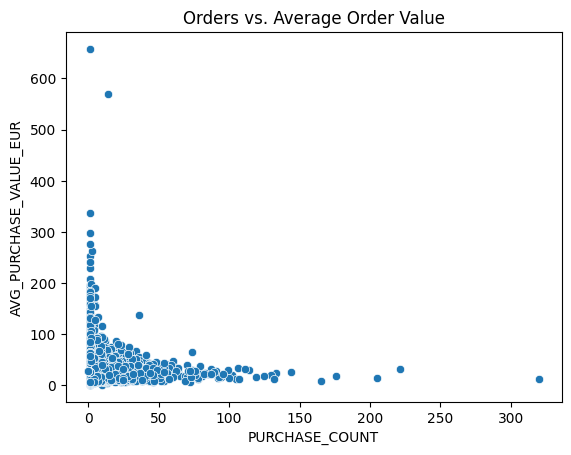

In [ ]:
# Average Purchase Value vs Order Count
sns.scatterplot(x='PURCHASE_COUNT', y='AVG_PURCHASE_VALUE_EUR', data=data)
plt.title("Orders vs. Average Order Value")
plt.show()

Most of the data points are tightly clustered near the lower left of the graph. This means most of the customers place small orders and have low average purchase value. There are few customers with much higher order counts but they have very low average purchase value . They tend to use services for quick or cheap items.

SPEND_SEGMENT
Low-Spend     15997
High-Spend     5986
Name: count, dtype: int64


<ipython-input-12-aa8f6507d10d>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SPEND_SEGMENT', data=data, order=['Low-Spend', 'Mid-Spend', 'High-Spend'], palette='coolwarm')


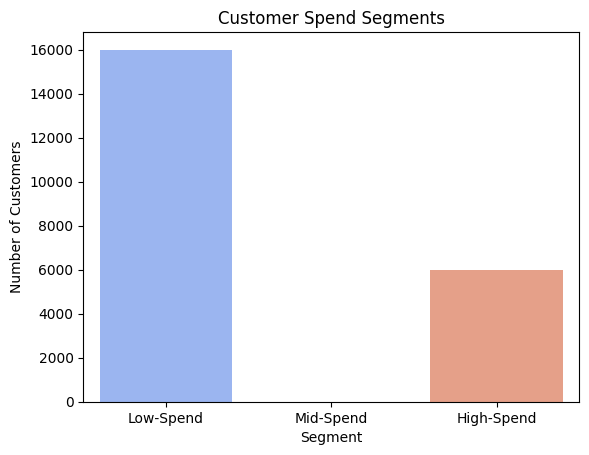

FREQ_SEGMENT
Infrequent    9955
Frequent      6028
Moderate      6000
Name: count, dtype: int64


<ipython-input-12-aa8f6507d10d>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FREQ_SEGMENT', data=data, order=['Infrequent', 'Moderate', 'Frequent'], palette='viridis')


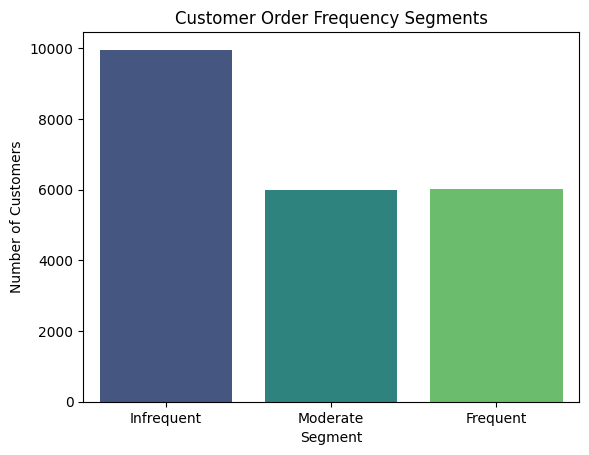

SPEND_FREQ_SEGMENT
Low-Spend / Infrequent    9955
Low-Spend / Moderate      5329
High-Spend / Frequent     5315
Low-Spend / Frequent       713
High-Spend / Moderate      671
Name: count, dtype: int64


<ipython-input-12-aa8f6507d10d>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SPEND_FREQ_SEGMENT', data=data,


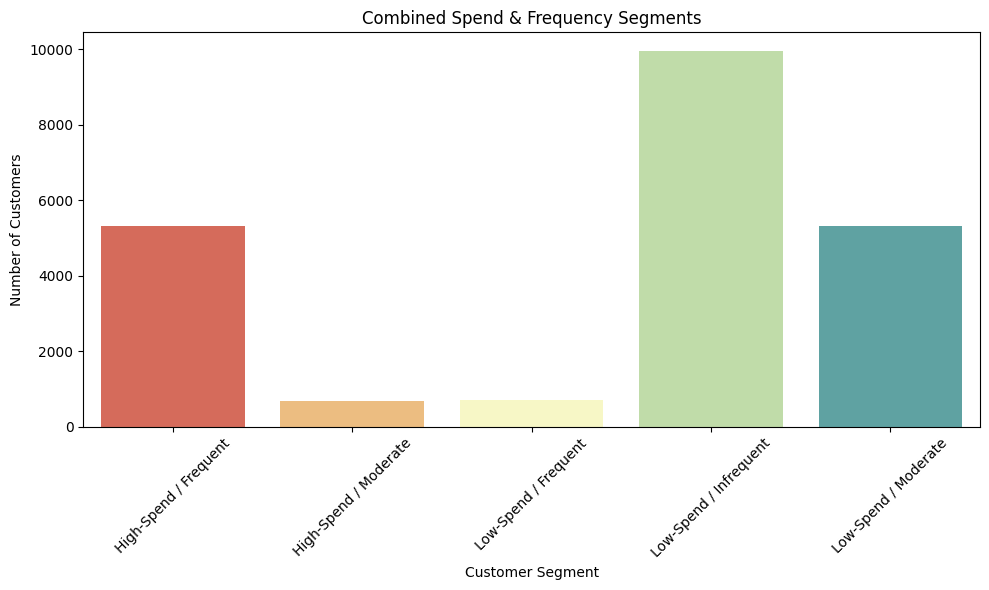

In [ ]:
# segmenting customers according to their spending behaviour and order frequency

# Create thresholds
quantiles = data['TOTAL_PURCHASES_EUR'].quantile([0.33, 0.66])
low_thresh = quantiles[0.33]
high_thresh = quantiles[0.66]

# Define segment logic
def spending_segment(amount):
    if amount <= low_thresh:
        return 'Low-Spend'
    elif amount <= high_thresh:
        return 'Mid-Spend'
    else:
        return 'High-Spend'

# Apply to dataset
data['SPEND_SEGMENT'] = data['TOTAL_PURCHASES_EUR'].apply(spending_segment)
print(data['SPEND_SEGMENT'].value_counts())

sns.countplot(x='SPEND_SEGMENT', data=data, order=['Low-Spend', 'Mid-Spend', 'High-Spend'], palette='coolwarm')
plt.title("Customer Spend Segments")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.show()

# Define frequency segments

# Create quantile thresholds
quantiles = data['PURCHASE_COUNT'].quantile([0.33, 0.66])
low_freq = quantiles[0.33]
high_freq = quantiles[0.66]

# Define frequency segments
def freq_segment(purchases):
    if purchases <= low_freq:
        return 'Infrequent'
    elif purchases <= high_freq:
        return 'Moderate'
    else:
        return 'Frequent'

# Apply segment
data['FREQ_SEGMENT'] = data['PURCHASE_COUNT'].apply(freq_segment)
print(data['FREQ_SEGMENT'].value_counts())

sns.countplot(x='FREQ_SEGMENT', data=data, order=['Infrequent', 'Moderate', 'Frequent'], palette='viridis')
plt.title("Customer Order Frequency Segments")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.show()


# Combine spend and frequency segments into a single composite segment
data['SPEND_FREQ_SEGMENT'] = data['SPEND_SEGMENT'] + ' / ' + data['FREQ_SEGMENT']

# View distribution
print(data['SPEND_FREQ_SEGMENT'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='SPEND_FREQ_SEGMENT', data=data,
              order=sorted(data['SPEND_FREQ_SEGMENT'].unique()),
              palette='Spectral')
plt.title("Combined Spend & Frequency Segments")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Customer spend segmentation shows that most users make minimal purchases, maybe casual, one-time or deal-driven.

customer order frequency shows there are more infrequent users which indicates there might be a possibility of churning and moderate users can be engaged to use services more through repeat incentives like order 3 times and get 1 free order or free delivery.

Segment and Strategy:
Low-Spend / Infrequent -  first-time user discounts.
Low-Spend / Frequent - Attract then with combos, value packs, delivery passes.
High-Spend / Frequent - VIP perks, loyalty points, fast delivery.
High-Spend / Moderate - Push usage habit – reminders, streak rewards
High-Spend / Infrequent - Reminder nudges, “we miss you” + time-sensitive offers

overall by combining spending and order frequency, the business can prioritize resource allocation to maximize both customer retention and revenue growth.



       SPEND_FREQ_SEGMENT        mean   median  count
0   High-Spend / Frequent  344.451479  223.652   5315
1   High-Spend / Moderate  110.761967   97.152    671
2    Low-Spend / Frequent   54.777161   57.684    713
3  Low-Spend / Infrequent   75.900000   75.900   9955
4    Low-Spend / Moderate   32.899590   30.360   5329


<ipython-input-13-7934d17f3b4c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=clv_stats, x='SPEND_FREQ_SEGMENT', y='mean', order=segment_order, palette='coolwarm')


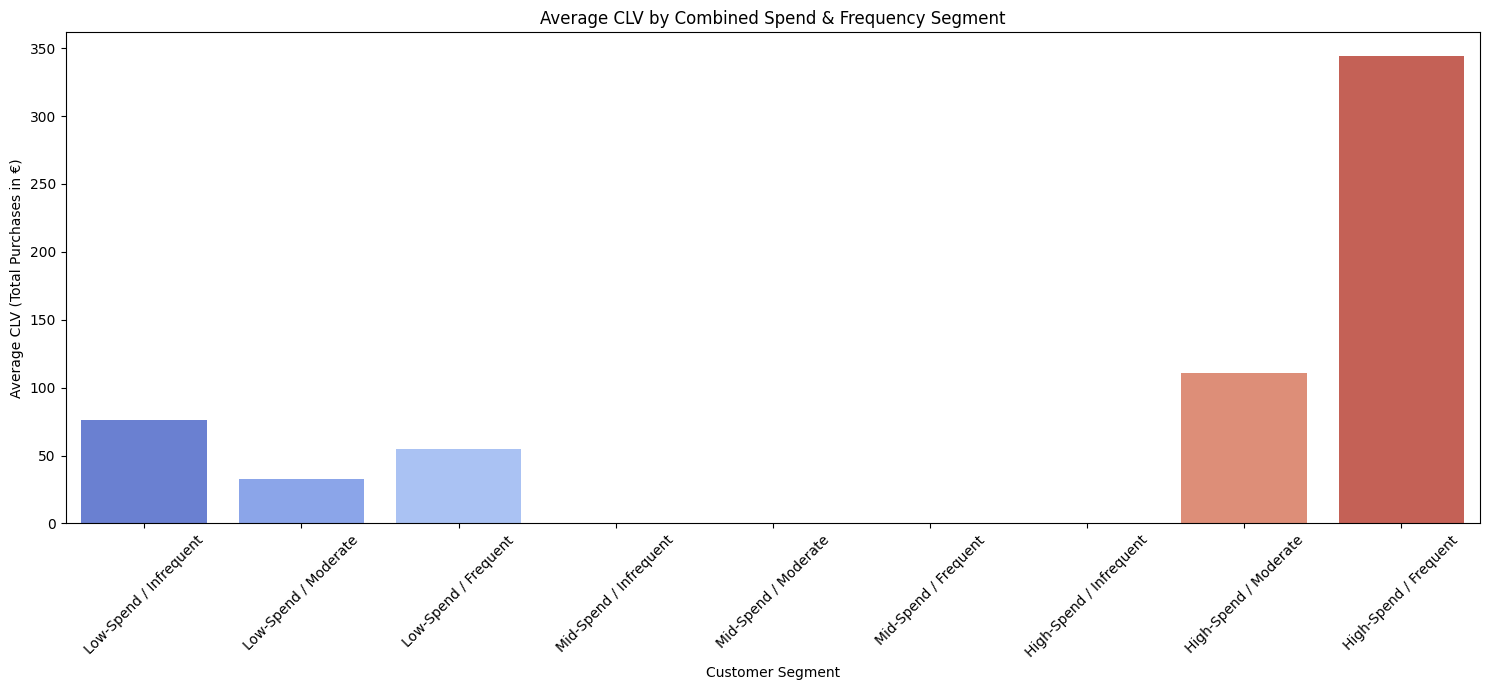

In [ ]:
# Average CLV(Customer lifetime Value) by Combined Spend & Frequency Segment

data['CLV'] = data['TOTAL_PURCHASES_EUR']

clv_stats = data.groupby('SPEND_FREQ_SEGMENT')['CLV'].agg(['mean', 'median', 'count']).reset_index()

print(clv_stats)

segment_order = ['Low-Spend / Infrequent', 'Low-Spend / Moderate', 'Low-Spend / Frequent',
                 'Mid-Spend / Infrequent', 'Mid-Spend / Moderate', 'Mid-Spend / Frequent',
                 'High-Spend / Infrequent', 'High-Spend / Moderate', 'High-Spend / Frequent']

plt.figure(figsize=(15,7))
sns.barplot(data=clv_stats, x='SPEND_FREQ_SEGMENT', y='mean', order=segment_order, palette='coolwarm')
plt.title("Average CLV by Combined Spend & Frequency Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Average CLV (Total Purchases in €)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

High spend/ frequent segment users has the highest CLV. This segment is more profitable. Even though the highspend/ frequent users are small percentage they are generating high revenue. In high spend category moderate to frequent users curve is steep which indicates even among high spenders converting occasional to regular users can dramatically lift CLV.

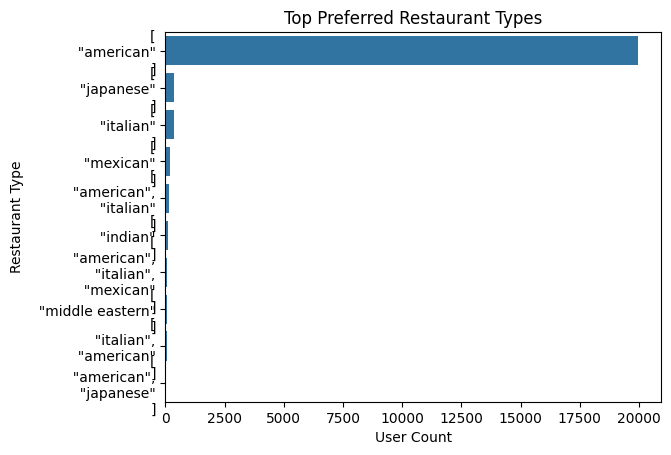

In [ ]:
# Preferred Restaurant Types
top_types = data['PREFERRED_RESTAURANT_TYPES'].value_counts().head(10)
sns.barplot(x=top_types.values, y=top_types.index)
plt.title("Top Preferred Restaurant Types")
plt.xlabel("User Count")
plt.ylabel("Restaurant Type")
plt.show()

This shows that american cuisine is overly dominant and other cuisines are very explored very rare or less. This could be solved  by boosting "meal of the week" promos.

<ipython-input-15-73c88f7fe3bd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='REGISTRATION_COUNTRY', y='TOTAL_PURCHASES_EUR', data=data, palette='viridis')


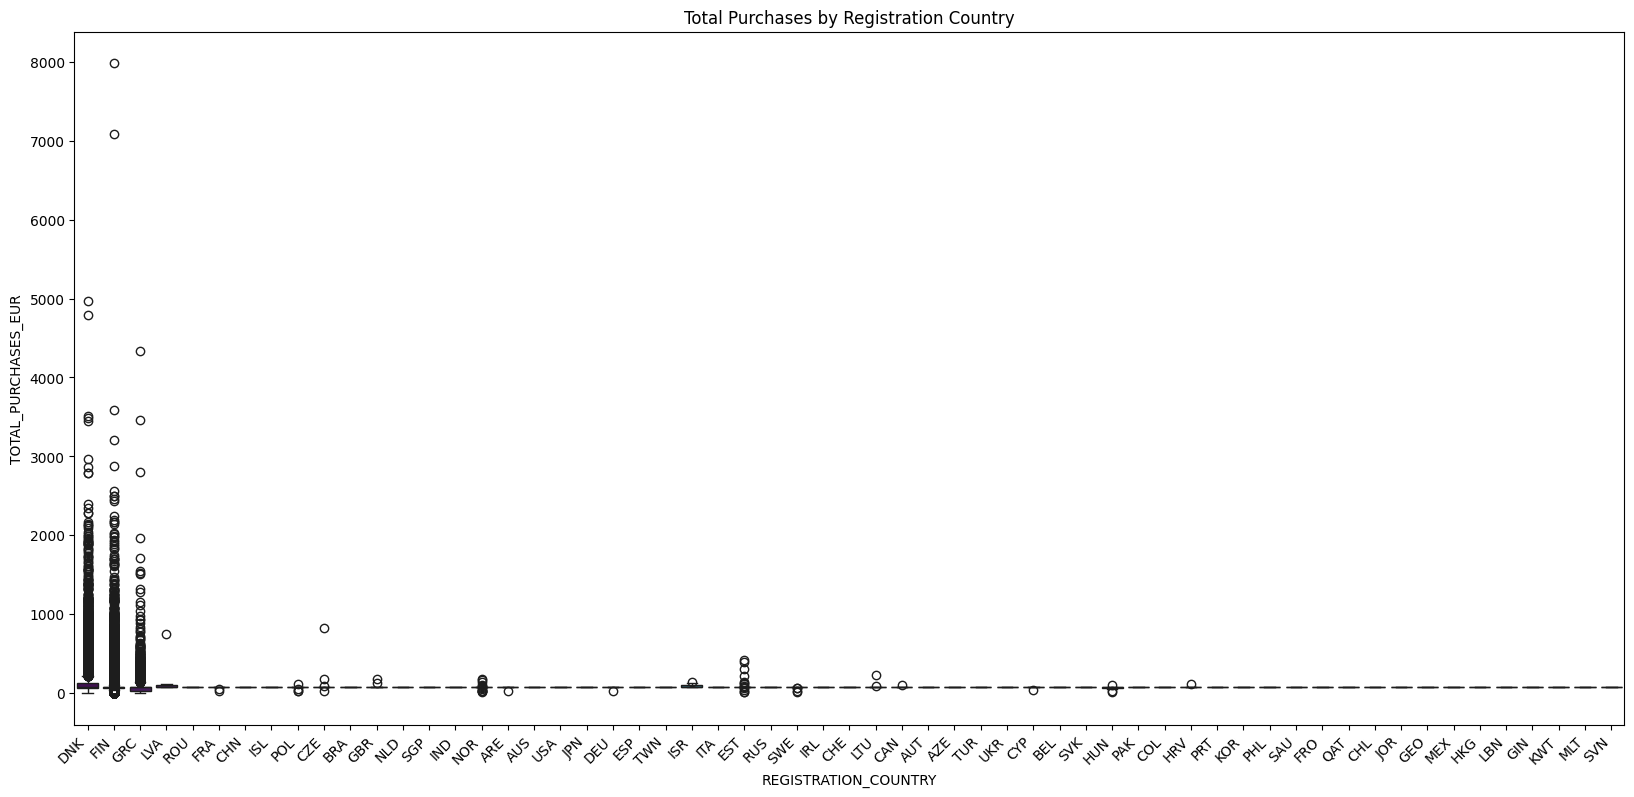

In [ ]:
# Total Purchases by Registration Country

plt.figure(figsize=(20,9))
sns.boxplot(x='REGISTRATION_COUNTRY', y='TOTAL_PURCHASES_EUR', data=data, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Total Purchases by Registration Country')
plt.show()


Most countries have are near to x-axis and have dense clusters with low purchases. This suggests that spending behavior is driven byuser type or lifestyle not on geographical alone.

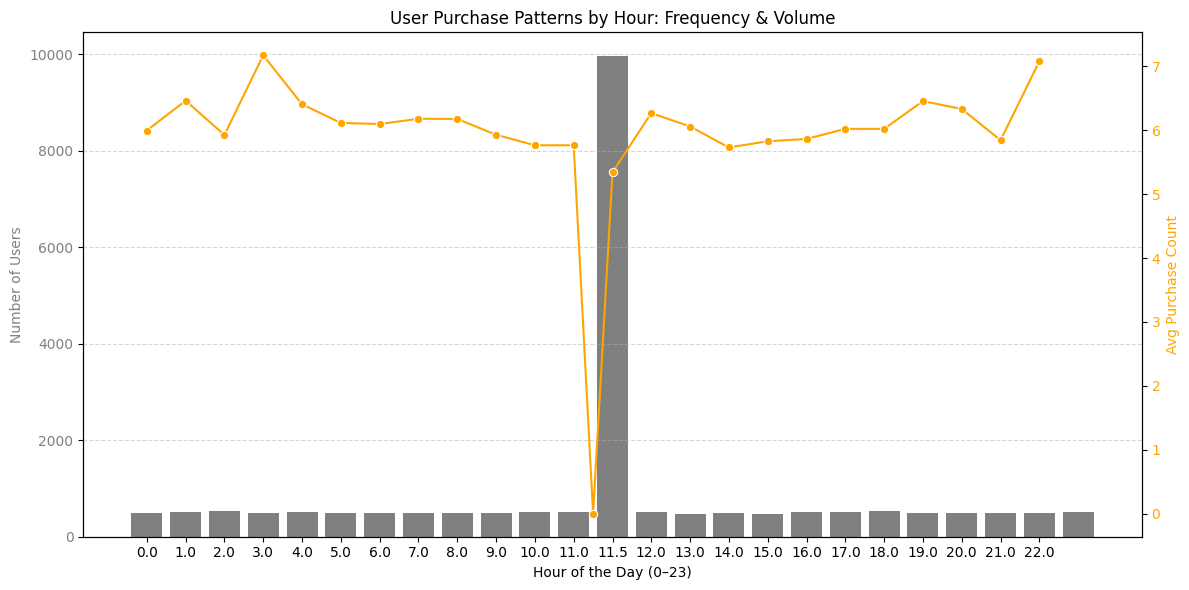

In [ ]:
# Hour of Purchase

hourly_user_counts = data['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE'].value_counts().sort_index()
avg_purchases_by_hour = data.groupby('MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE')['PURCHASE_COUNT'].mean()

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart: Number of users with that most common hour
sns.barplot(x=hourly_user_counts.index, y=hourly_user_counts.values, color='grey', ax=ax1)
ax1.set_xlabel("Hour of the Day (0–23)")
ax1.set_ylabel("Number of Users", color='grey')
ax1.tick_params(axis='y', labelcolor='grey')

# Line chart: Average purchase count by hour (secondary axis)
ax2 = ax1.twinx()
sns.lineplot(x=avg_purchases_by_hour.index, y=avg_purchases_by_hour.values, marker='o', color='orange', ax=ax2)
ax2.set_ylabel("Avg Purchase Count", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Titles and layout
plt.title("User Purchase Patterns by Hour: Frequency & Volume")
ax1.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

This dual-axis graph shows:

bar chart : MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE

line chart: Average purchase count per user at that hour


Purchase count is consistently high across all hours,with minor fluctuations. This suggests that users are actively placing orders at nearly every hour. There is sharp drop at 12 noon almost to zero but the user count is high suggesting a error or redording issue at that hour. At next hout 1 pm immediately returns to high average purchase count. Late nights and early mornings, users are highly engaged, a great ooportunity to introduce night-only offers or exclusive menus and also off-hour delivery demand.

The sudden drop in orders at noon need to checked and the raw data should be cleaned again.

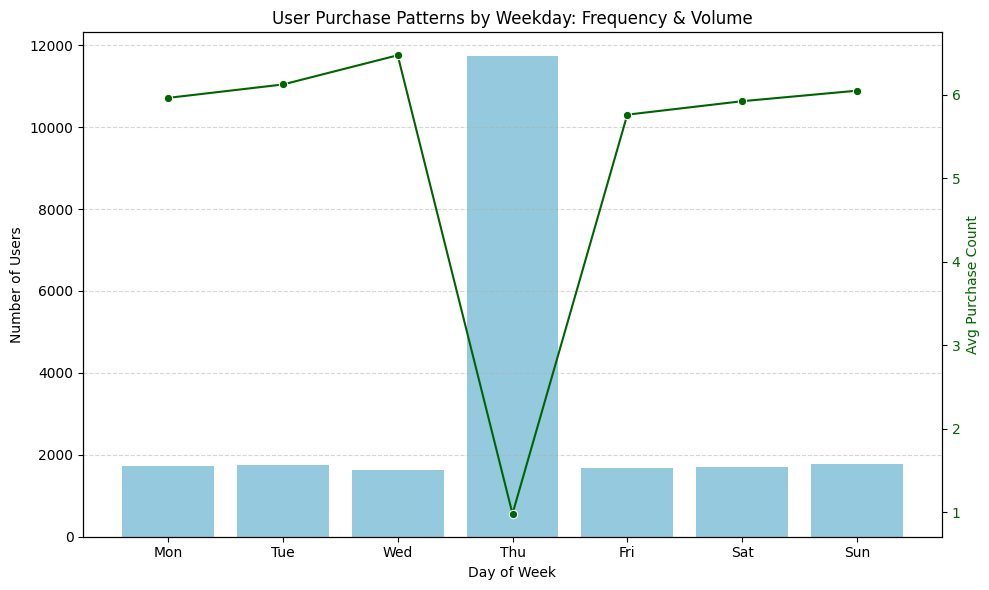

In [ ]:
# Weekday Purchase

weekday_map = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}

# Prepare weekday counts
weekday_user_counts = data['MOST_COMMON_WEEKDAY_TO_PURCHASE'].value_counts().sort_index()
weekday_user_counts.index = weekday_user_counts.index.map(weekday_map)

# Prepare average purchase count by weekday
avg_purchases_by_weekday = data.groupby('MOST_COMMON_WEEKDAY_TO_PURCHASE')['PURCHASE_COUNT'].mean()
avg_purchases_by_weekday.index = avg_purchases_by_weekday.index.map(weekday_map)

# Sort to maintain weekday order
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_user_counts = weekday_user_counts.reindex(weekday_order)
avg_purchases_by_weekday = avg_purchases_by_weekday.reindex(weekday_order)

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barplot: Number of users who prefer each weekday
sns.barplot(x=weekday_user_counts.index, y=weekday_user_counts.values, color='skyblue', ax=ax1)
ax1.set_xlabel("Day of Week")
ax1.set_ylabel("Number of Users")
ax1.tick_params(axis='y', labelcolor='black')

# Lineplot: Average purchase count for users with that preferred weekday
ax2 = ax1.twinx()
sns.lineplot(x=avg_purchases_by_weekday.index, y=avg_purchases_by_weekday.values, marker='o', color='darkgreen', ax=ax2)
ax2.set_ylabel("Avg Purchase Count", color='darkgreen')
ax2.tick_params(axis='y', labelcolor='darkgreen')

# Final touches
plt.title("User Purchase Patterns by Weekday: Frequency & Volume")
ax1.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


This dual-axis graph shows:

bar chart : MOST_COMMON_WEEKDAY_TO_PURCHASE

line chart: Average purchase count per user

Purchase count is hgh accross all days except on thursday (sudden drop in orders count) even though the users have that day as top purchase day. Many users purchase midweek but purchase count is low. By introducing midweek specials or midweek offers encourage users to order same day if it's not an anamoly as there is a sudden drop.


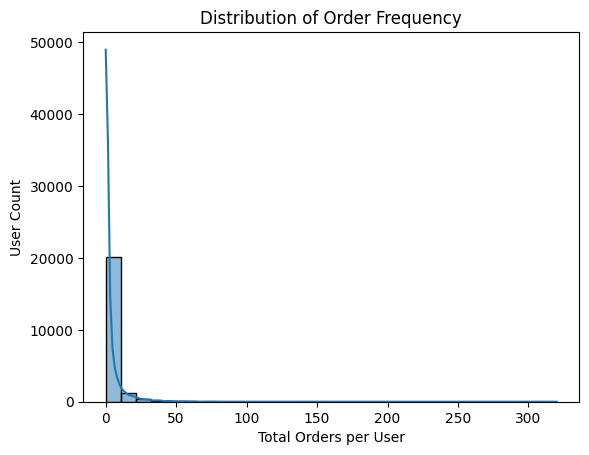

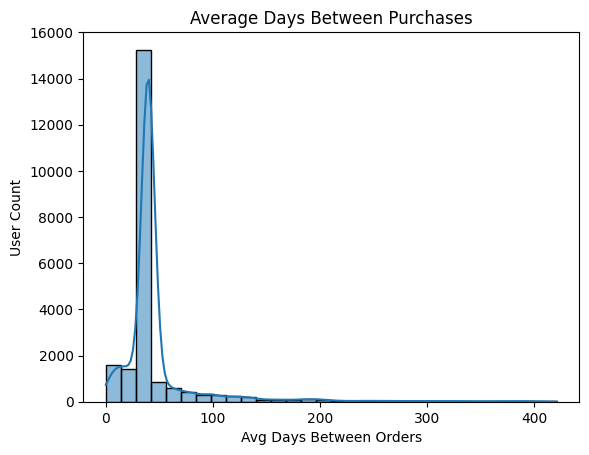

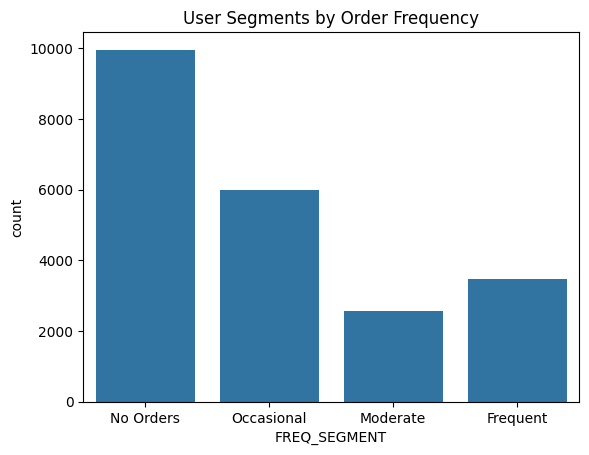

In [ ]:
# Order Frequency
data['PURCHASE_COUNT'].describe()


sns.histplot(data['PURCHASE_COUNT'], bins=30, kde=True)
plt.title("Distribution of Order Frequency")
plt.xlabel("Total Orders per User")
plt.ylabel("User Count")
plt.show()

# time gap between orders

sns.histplot(data['AVG_DAYS_BETWEEN_PURCHASES'], bins=30, kde=True)
plt.title("Average Days Between Purchases")
plt.xlabel("Avg Days Between Orders")
plt.ylabel("User Count")
plt.show()

# segmenting users by frequency
def frequency_segment(x):
    if x == 0:
        return 'No Orders'
    elif x <= 2:
        return 'Occasional'
    elif x <= 5:
        return 'Moderate'
    else:
        return 'Frequent'

data['FREQ_SEGMENT'] = data['PURCHASE_COUNT'].apply(frequency_segment)
sns.countplot(x='FREQ_SEGMENT', data=data, order=['No Orders', 'Occasional', 'Moderate', 'Frequent'])
plt.title("User Segments by Order Frequency")
plt.show()

Order Frequency distribution:
1. most users made very few orders. A long tail suggests that a small number of users placed dozens or hundreds of orders.
2. The majority of users are one-time users indicates weak engagement after registering. deals and offers should be promoted frequently and reminders should be more often.

Average Days between purchases:
1. Most users who can be categorized as frequent buyers has average gap of around 5-7 days. some users had weeks or even months gap between orders.
2. Including weekly meal plan or reminding users to order with 'we miss you' offers.

User segments by order frequency:
1. Apart from inactive users which is highest segment, many users are occasional. Frequent users are few but likely account for large revenue.
2. Targeting occasional users with rerder buttons ot time-based deals helps in pulling the users to order.

**Segmenting users using K-means clustering**

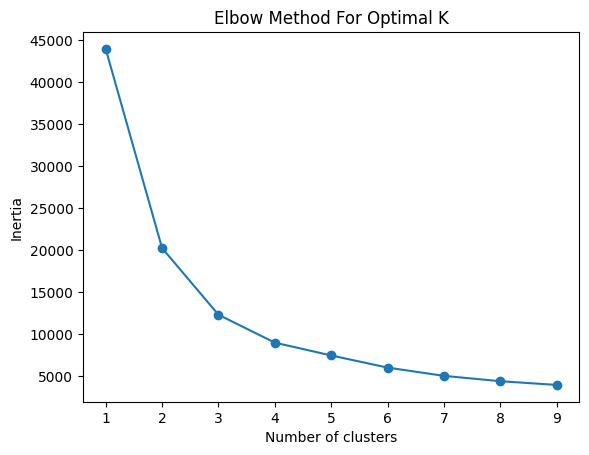

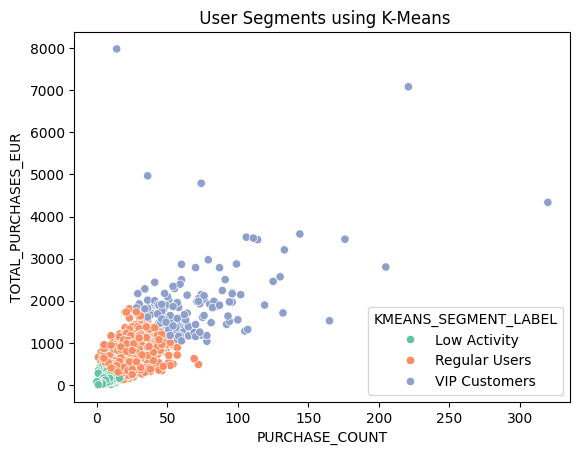

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select features for clustering
features = data[['PURCHASE_COUNT', 'TOTAL_PURCHASES_EUR']].copy()

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine optimal number of clusters using Elbow Method (optional visualization)
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()


# Apply K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMEANS_SEGMENT'] = kmeans.fit_predict(scaled_features)

# 4. Assign readable labels to clusters
cluster_labels = {
    0: 'Low Activity',     # low purchase count and spend
    1: 'Regular Users',    # medium values
    2: 'VIP Customers'     # high purchase count and spend
}
data['KMEANS_SEGMENT_LABEL'] = data['KMEANS_SEGMENT'].map(cluster_labels)


#visualize new labeled clusters
sns.scatterplot(data=data, x='PURCHASE_COUNT', y='TOTAL_PURCHASES_EUR', hue='KMEANS_SEGMENT_LABEL', palette='Set2')
plt.title(' User Segments using K-Means')
plt.show()


**Elbow Plot Summary**
This chart helps us find the right number of customer groups (clusters).

The "elbow" in the curve happens at 3, which means grouping customers into 3 segments is ideal.

More than 3 groups doesn't add much value. It just complicates things.

**K-Means Cluster Plot Summary**
This chart shows how customers are grouped based on how many times they ordered and how much they spent.

The 3 customer segments are:

Low Orders & Low Spend → New or inactive users (green)

Medium Orders & Medium Spend → Average, steady users (orange)

High Orders & High Spend → Loyal, high-value customers (blue)

### Metrics to track

The 4 high-impact metrics that directly drive revenue, growth and customer retention for a business like WOLT.

1. Conversion Rate (Sign-ups to first order):
    
    track: The percentage of registered users who place atleast one order.
    why: This metric helps you understand how effectively onboarding process converting users into actual customers. A low conversion rate may suggest issues with user experience, welcome offer attractiveness,which can be addresses to increase active user base and revenue.


2. Average Order Value(AOV):
     
     track: the mean value of each purchase (total revenue/ number of orders)
     
     why: Average order value provide insights into customer spending behavior. Tracking AOV helps identifying upselling opportunities, pricing strategies and check the impact of promotions or bundled offers on revenue. It also acts as lever for improving customer lifetime value.
     
     
3. Order Frequency:
    
    track: How often a user places an order over a specific time period.
    why: This metric highlights customer engagemnet and retention. Frequent orders indicate a higher level customer satisfaction and loyalty while infrequent orders suggest potential churn risks. By identifing patterns in order frequency, you can design targeted retention campaigns and improve service features like personalized recommendations based on previous oreders or subscription-based deals.
    
    
4. Churn rate:
    
    track: The percentage of customers who stop ordering over a defined period.
    
    why: This metric is a critical indicator of overall customer health. High churn rate means dissatisfaction, no attractive offers or deals or operational issues. Tracking this helps in understanding retention challenges and quantifying the success of re-engagement strategies, ultimately aiding in predicting customer lifetime value and making proactive improvements.
    
    
By tracking and analyzing these metrics Wolt can gain valuable insights into customer behavior, identify areas for improvement and make decision to optimize their business strategy and drive growth.

### Key Insights

1. Most users are infrequent or one-time buyers. Only a small percentage are frequent, high-engagement users.
2. Small segment users (frequent & high spend users) placed dozens to hundreds of orders, generating a high revenue. These users are highly engaged and represent high customer lifetime value.
3. A group of users who are frequent or place multiple orders have an average gap of 5-7 days(approx a week) between purchases.
4. Many users never place an order or stop after first order. This can be predicted based on order frequency, delay in first order and total spent.
5. User segmentation shows targted growth. Low frequency orders and high spend users are VIPs and High frequency orders and low spend users are loyal but value-focused.

To grow sustainably, wolt should convert new users faster, retain high-frequency users and optimize strategies by user segment and purchase patterns.